In [1]:
# Importing the Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix

import tensorflow as tf 
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,GlobalMaxPooling2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Model

In [2]:
# Importing the dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
# Printing the shape
print(f'x train shape:{x_train.shape}')
print(f'x test shape:{x_test.shape}')
print(f'y train shape:{y_train.shape}')
print(f'y test shape:{x_test.shape}')

x train shape:(60000, 28, 28)
x test shape:(10000, 28, 28)
y train shape:(60000,)
y test shape:(10000, 28, 28)


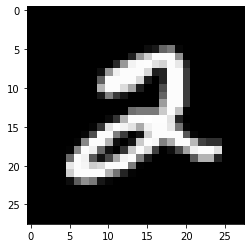

In [4]:
# Plotting a numeral
plt.imshow(x_train[5],cmap='gray')
plt.show()

In [5]:
# Reducing the dimension from 0 to 255 to 0 to 1 and adding a dimension 
x_train=x_train/255.0
x_test=x_test/255.0
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(f'x train shape:{x_train.shape}')
print(f'x test shape:{x_test.shape}')

x train shape:(60000, 28, 28, 1)
x test shape:(10000, 28, 28, 1)


In [6]:
# Number of classes
K=len(set(y_train))
print(f'No of Classes: {K}')

No of Classes: 10


In [14]:
# Building the model

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model=Model(i,x)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)       

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [16]:
batch_size=32

data_generator=tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)

train_generator=data_generator.flow(x_train,y_train,batch_size)

steps_per_epoch=x_train.shape[0]//batch_size

r=model.fit(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 312s 167ms/step - loss: 0.2537 - accuracy: 0.9259 - val_loss: 0.1326 - val_accuracy: 0.9595
Epoch 2/50
1875/1875 [==============================] - 247s 132ms/step - loss: 0.1138 - accuracy: 0.9672 - val_loss: 0.0798 - val_accuracy: 0.9760
Epoch 3/50
1875/1875 [==============================] - 244s 130ms/step - loss: 0.0948 - accuracy: 0.9726 - val_loss: 0.0631 - val_accuracy: 0.9809
Epoch 4/50
1875/1875 [==============================] - 244s 130ms/step - loss: 0.0848 - accuracy: 0.9750 - val_loss: 0.0855 - val_accuracy: 0.9779
Epoch 5/50
1875/1875 [==============================] - 244s 130ms/step - loss: 0.0753 - accuracy: 0.9789 - val_loss: 0.0450 - val_accuracy: 0.9853
Epoch 6/50
1875/1875 [==============================] - 235s 126ms/step - loss: 0.0679 - accuracy: 0.9804 - val_loss: 0.0485 - val_accuracy: 0.9848
Epoch 7/50
1875/1875 [==============================] - 231s 123ms/step - loss: 0.0660 - accuracy: 0.9816 - val_

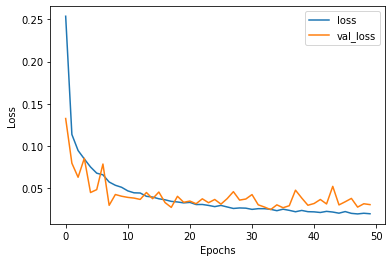

In [19]:
# Plotting the losses and the accuracy
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

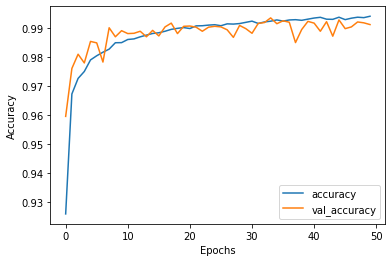

In [20]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [21]:
# Predicting the dataset
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

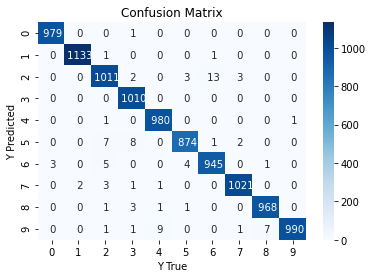

In [22]:
# Calculating Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,fmt=' ',cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Y True')
ax.set_ylabel('Y Predicted');


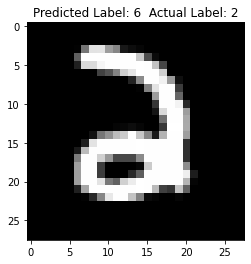

In [23]:
# Checking some where the model identified wrong
missclassified_idx=np.where(y_pred!=y_test)[0]
i=np.random.choice(missclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('Predicted Label: %s  Actual Label: %s' %(y_pred[i],y_test[i]))
plt.show()